In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
vaccine_data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
vaccine_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
#[(col,vaccine_data[col].isnull().sum()) for 
 #col in vaccine_data.columns if vaccine_data[col].isnull().any()]
vaccine_data.drop('iso_code', axis=1, inplace=True)

In [4]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62612 entries, 0 to 62611
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   continent                              61884 non-null  object 
 1   location                               62612 non-null  object 
 2   date                                   62612 non-null  object 
 3   total_cases                            62021 non-null  float64
 4   new_cases                              62013 non-null  float64
 5   new_cases_smoothed                     61054 non-null  float64
 6   total_deaths                           53452 non-null  float64
 7   new_deaths                             53450 non-null  float64
 8   new_deaths_smoothed                    61054 non-null  float64
 9   total_cases_per_million                61665 non-null  float64
 10  new_cases_per_million                  61657 non-null  float64
 11  ne

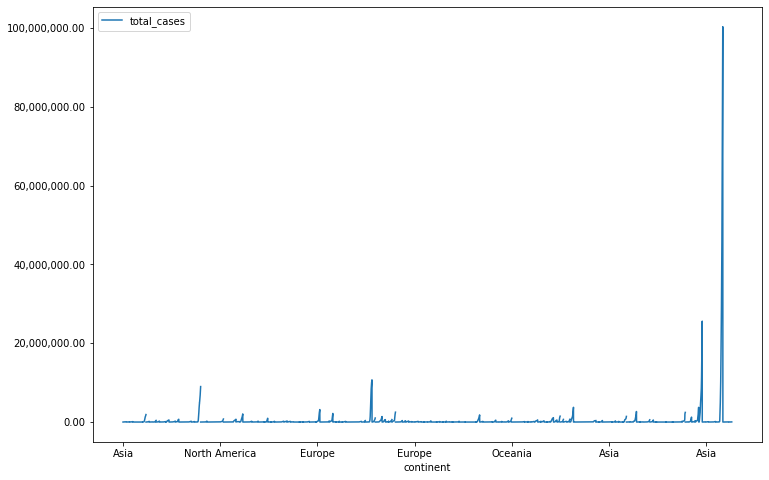

In [4]:
ax = vaccine_data.plot(x= 'continent', y = 'total_cases', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

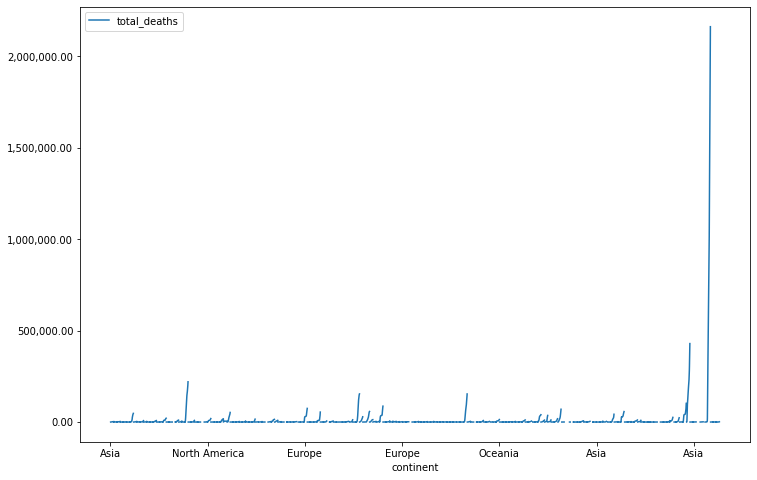

In [6]:
ax = vaccine_data.plot(x= 'continent', y = 'total_deaths', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

In [5]:
vaccine_data['continent'].value_counts()

Africa           17167
Asia             15730
Europe           15716
North America     7538
South America     3995
Oceania           1738
Name: continent, dtype: int64

In [11]:
#vaccine_data.plot(kind='bar',x='date',y='total_vaccinations_per_hundred',title='Date vs total_vaccinations_per_hundred')

<AxesSubplot:title={'center':'Date vs total_vaccinations_per_hundred'}, xlabel='date'>

In [ ]:
#.plot(kind='bar',x='country',y='people_vaccinated',title='People vaccinated per Country')

In [ ]:
fig=px.choropleth(data_frame= vaccine_data,
                          locations=  vaccine_data['country'],
                          locationmode='country names',
                          color= vaccine_data['total_vaccinations_per_hundred'],
                          animation_frame= vaccine_data['date'],
                          animation_group= vaccine_data['vaccines'])
fig.update_layout(dict1={'title':'Total Vaccinations per hundred'})
fig.show() 

In [ ]:
vaccine_data['death_rate'] = (vaccine_data['new_deaths_smoothed_per_million'] / vaccine_data['new_cases_smoothed_per_million']).replace(np.inf,np.nan)
vaccine_data['population_coverage'] = vaccine_data['total_tests'] / vaccine_data['population']
vaccine_data['datetime'] = pd.to_datetime(vaccine_data['date'])

In [ ]:
trace1 = go.Scatter(
    x=vaccine_data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=vaccine_data.groupby(['date'])['new_tests_smoothed'].sum().astype(int),
        xaxis='x2',
    yaxis='y2',
    name = "new tests smoothed"
)
trace2 = go.Scatter(
    x=vaccine_data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=vaccine_data.groupby(['date'])['new_deaths_smoothed'].sum().astype(int),
    name = "new deaths smoothed"
)
trace3 = go.Scatter(
    x=vaccine_data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=(vaccine_data.groupby(['date'])['positive_rate'].mean() * 100).round(3),
    xaxis='x3',
    yaxis='y3',
    name = "test positive rate %"
)
trace4 = go.Scatter(
    x=vaccine_data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=vaccine_data.groupby(['date'])['new_cases_smoothed'].sum().astype(int),
    xaxis='x4',
    yaxis='y4',
    name = "new cases smoothed"
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'New tests, deaths, cases and test positive rate'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)